00001578236
Adam Graham
CSCI185 - HW2

In [ ]:
#Q1 loading the data
import pandas as pd
import scipy.stats as stats
import sklearn
from sklearn import preprocessing
from sklearn import datasets

chp = sklearn.datasets.fetch_california_housing()

df = pd.DataFrame(data=chp.data, columns=chp.feature_names)
df["target"] = chp.target

df.apply(stats.zscore)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,1.165100
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,1.172900
...,...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826,-1.115804
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722,-1.124470
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713,-0.992746
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626,-1.058608


In [ ]:
#Q1 Normalizing the data
X = chp.data
Y = chp.target

normalized_X = preprocessing.normalize(X)
print(normalized_X)

[[ 0.0238481   0.1174473   0.02000651 ...  0.00732056  0.10850985
  -0.3501362 ]
 [ 0.00345241  0.00873354  0.00259434 ...  0.00087745  0.01574533
  -0.05082923]
 [ 0.01409202  0.10097076  0.01609345 ...  0.00544128  0.07349506
  -0.23735895]
 ...
 [ 0.00167455  0.01674553  0.00512762 ...  0.00229082  0.03883978
  -0.11940547]
 [ 0.00248251  0.02393168  0.00708579 ...  0.00282289  0.05242368
  -0.16129955]
 [ 0.00171478  0.0114864   0.00377236 ...  0.00187873  0.02826371
  -0.08703817]]


In [ ]:
#Q2 - Boston
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.data.shape)
print(boston.feature_names) 

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

<ipython-input-7-c89244656b29>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = bhp.drop("Price", 1)


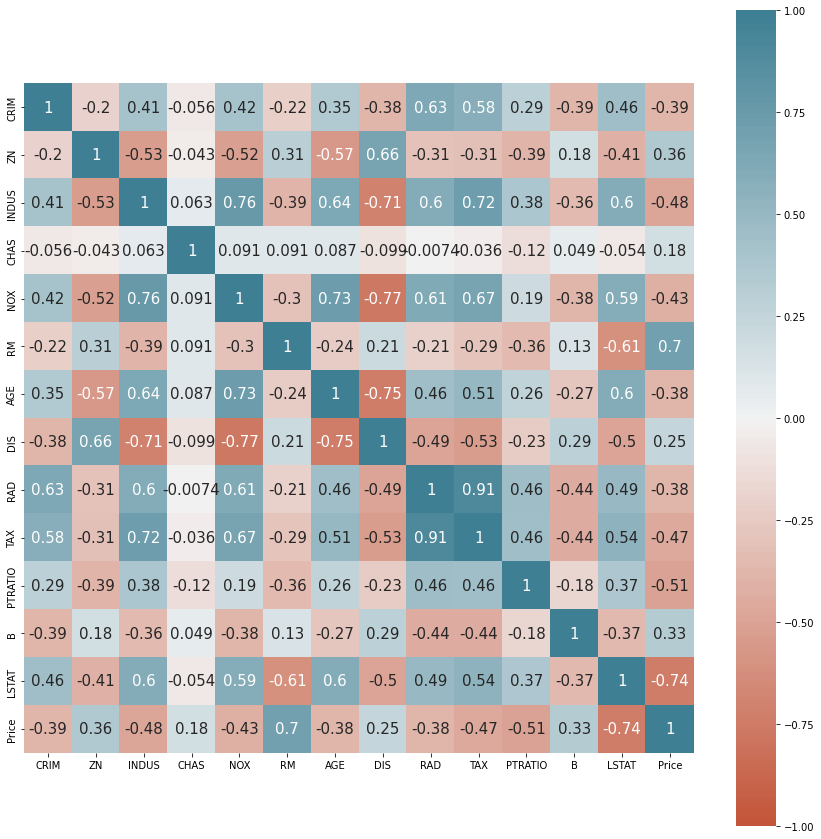

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

bhp = pd.DataFrame(boston.data, columns = boston.feature_names)
bhp['Price'] = boston.target
X = bhp.drop("Price", 1)       
y = bhp['Price']              

bhp.head()

bhp.corr()

plt.subplots(figsize=(15,15))
sns.heatmap(bhp.corr(), vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),annot=True, annot_kws={'size': 15},square=True)

2) Features highly correlated to each other:   
  LSTAT and price, negative
  
  TAX and RAD, strong postive
  
  DIS and NOX, negative
  
  DIS and AGE, negative

--------------------------

3)Features highly coorelated to target

LSTAT, negatively correlated. 

PTRatio, Negatively correlated.


  

In [119]:
#Q2 - Movies
import pandas as pd
df = pd.read_csv("MoviesOnStreamingPlatforms.csv")
df = df.drop('Unnamed: 0', 1)
df = df.dropna()
print(df.columns)

Index(['ID', 'Title', 'Year', 'Age', 'Rotten Tomatoes', 'Netflix', 'Hulu',
       'Prime Video', 'Disney+', 'Type'],
      dtype='object')


<ipython-input-119-3c188e44e5d4>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Unnamed: 0', 1)


In [122]:
v = []
for score in df['Rotten Tomatoes']:
  v.append(float(Fraction(score)))

df['Rotten Tomatoes'] = v


0       0.98
1       0.97
2       0.95
3       0.94
4       0.94
        ... 
9503    0.16
9505    0.14
9507    0.14
9508    0.14
9514    0.10
Name: Rotten Tomatoes, Length: 5338, dtype: float64

Q2 Corr (Movie)

Index(['ID', 'Title', 'Year', 'Age', 'Rotten Tomatoes', 'Netflix', 'Hulu',
       'Prime Video', 'Disney+', 'Type'],
      dtype='object')


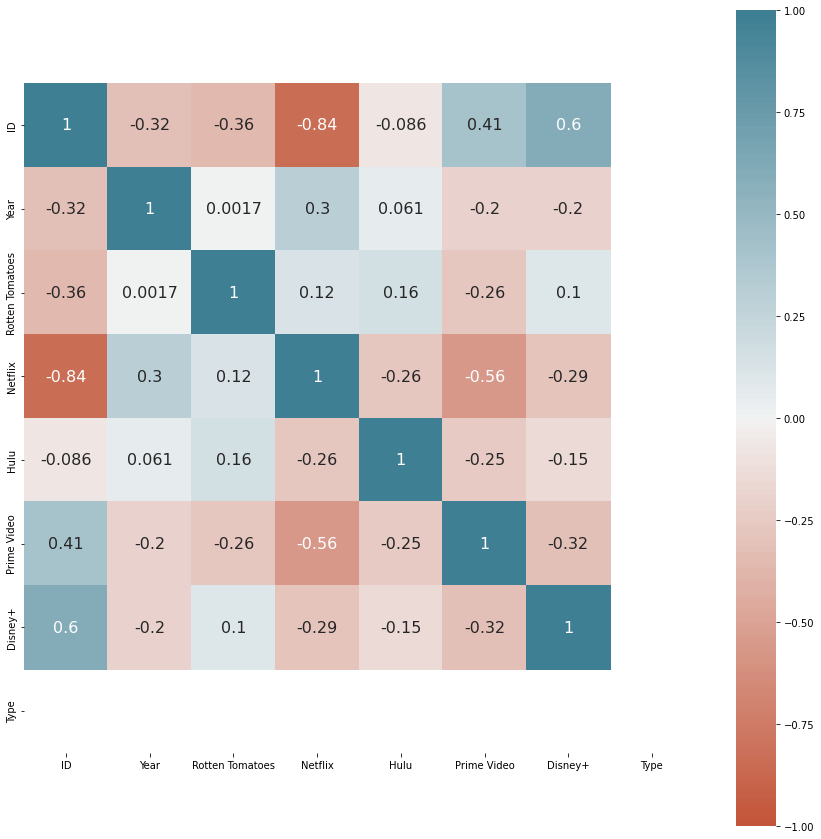

In [123]:
from fractions import Fraction
print(df.columns)

plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),annot=True, annot_kws={'size': 16}, square=True)

2) Features highly correlated to each other: 

ID and disney+ have positive

Prime Video and ID have positive

Netflix and ID have strong negative

Year and ID have negative

Year and Disney+ have negative

Year and Primve Video have negative

Year and Netflix has positive

Year and ID has negative

Netflix has negative with Disney+, Strong negative with Prime Video, positive with year and Strong negative with ID

Hulu has negative with Disney+, negative with Prime Video, Negative with Hulu, and the rest of the features don't show any strong correlations.

Prime video has negative with disney+, negative with hulu, strong negative with netflix, negative with year and positive with ID

Disney+ has negative with prime video, negative with hulu and netflix and year, positive with ID

3)Features highly coorelated to target

The target in our case is the Rotten Tomatoes score. It has a positive correlation with hulu and a strong negative with prime video and ID retrospectively compared to the rest of the stuff in the matrix

Q3 - Ethics


As stated when loading the boston dataset into the file, there is an ethical issue with the dataset. The issue is that house prices heavily correlated with the race of the neighborhoods, which meant that it affected other categories as well as predictive models created from this dataset. There isn't anything that can be done about it because the data is flawed and will lead to flawed results no matter what.